In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
data = pd.read_csv("data.csv", index_col=0)
data

,X1,X2
1,1.6,0.7
2,0.2,0.2
3,0.9,0.6
4,1.8,1.9
5,0.2,1.9
6,0.1,1.2
7,1.8,0.6
8,0.8,0.9
9,0.7,0.3
10,1.3,0.2


In [3]:
data_numpy = data.to_numpy()
# data_numpy

### a. 將10比資料點化在（x,y）座標圖上，並描述其聚類情況

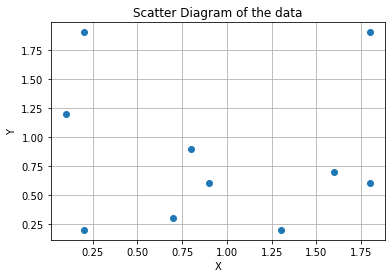

In [4]:
plt.title("Scatter Diagram of the data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(data_numpy[:,0],
            data_numpy[:,1])
plt.grid(True)
plt.show()

centroids:[[0.15       1.55      ]
 [0.78       0.44      ]
 [1.73333333 1.06666667]]


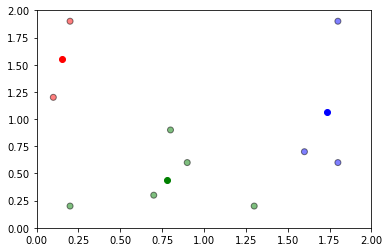

In [9]:
from sklearn.cluster import KMeans

AMOUNT_OF_CENTERS = 3
kmeans = KMeans(n_clusters=AMOUNT_OF_CENTERS)
kmeans.fit(data)

labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(f'centroids:{centroids}')
fig = plt.figure()

# 宣告 colmap
colmap = {1:'r', 2:'g', 3:'b', 4:'c', 5:'y'}
colors = map(lambda x: colmap[x+1], labels)

plt.scatter(data['X1'], data['X2'], color=list(colors), alpha=0.5, edgecolors='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

In [ ]:
initial_weights = pd.read_csv("initial_weights.csv", index_col=0)
history_weights = initial_weights
initial_weights

In [ ]:
initial_weights_nparray = initial_weights.to_numpy()

model_weights = initial_weights_nparray

### b. 初始權重在（x,y）座標圖上之分布情形

In [ ]:
plt.title("Scatter Diagram of the initial weights of SOMNN")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(initial_weights_nparray[:,0],
            initial_weights_nparray[:,1])
plt.grid(True)
plt.show()


### c.
* 若網路之學習速率為1.0、初始鄰近半徑為2.0，
並採逐例學習，當第一個資料點（1.6,0.7）代入網路學習時，
請找出網路之優勝神經元，並計算各神經元之權重改變量。

In [ ]:
from numpy.linalg import norm

# learning rate
lr = 1.0

# radius of neighborhood
radius = 2.0

# constant
tau_1 = 1000/np.log(radius)

k = 1
def R(k):
    return radius*np.exp(-k/tau_1)

def eta(k):
    return lr*np.exp(-k/1000)   # tau_2 = 1000

for_plt = []
for_plt.append(model_weights)

for x in range(len(data_numpy)):
    # Find the winner neuron
    shortest_distance = np.inf
    for i in range(len(model_weights)):
        distance = np.linalg.norm(data_numpy[x]-model_weights[i])
        if(distance < shortest_distance):
            shortest_distance = distance
            q = i
    #print(f'the winner node is {q}')

    # updating model weights
    for j in range(len(model_weights)):
        # compute neighborhood function
        term = -(model_weights[j]-model_weights[q])**2/2*R(k)**2
        h = np.exp(term)

        model_weights[j] += eta(k)*h*(data_numpy[x]-model_weights[j])
        model_weights[j] = np.round_(model_weights[j],6)

    for_plt.append(copy.deepcopy(model_weights))
    history_weights["Iterations {0}".format(x)] = model_weights.tolist()

In [ ]:
for_plt[1] - for_plt[0]

### d. 將其餘的資料點代入網路，計算網路各神經元之權重改變量。

In [ ]:
history_weights

In [ ]:
from IPython import display
%matplotlib inline

fig = plt.figure()
# plt.ion()

for index in range(len(for_plt)):
    fig.clf()
    plt.title(f"Scatter Diagram of Model Weights at Iteration: {index}\nrecommend to run on Jupyter Notebook for animation. ")

    plt.scatter(for_plt[index][:,0],
                for_plt[index][:,1])

    # np.set_printoptions(precision=8)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0,2)
    plt.ylim(0,2)
    plt.grid(True)

    display.clear_output(wait=True)
    plt.pause(0.4)

# plt.ioff()

plt.show()